### ISMデータ
#### https://note.com/scilabcafe/n/n3b81ab812775

In [1]:
import pandas_datareader.data as web
import quandl
import datetime
import matplotlib.pyplot as plt

# 2000/1/1から現在まで
start = '2000-01-01'
end = datetime.date.today()

# PMIデータ取得
df_pmi = quandl.get("ISM/MAN_PMI",start_date=start, end_date=end)

In [2]:
# ボーダーライン 50のデータフレームを作成
df_y = df_pmi.copy()
df_y['PMI'] = 50

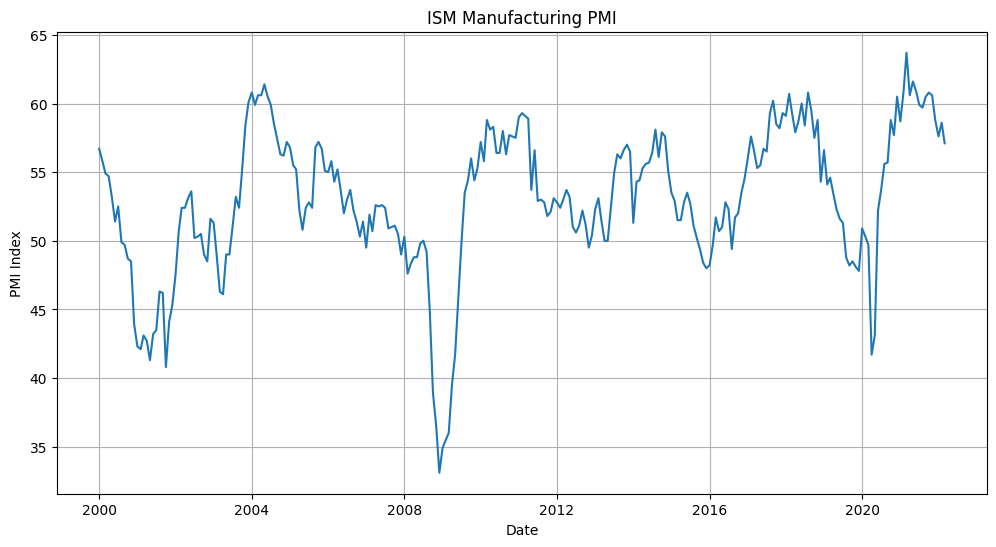

In [3]:
# データのグラフ表示
plt.figure(figsize=(12, 6))
plt.plot(df_pmi.index, df_pmi['PMI'])
plt.xlabel('Date')
plt.ylabel('PMI Index')
plt.title('ISM Manufacturing PMI')
plt.grid(True)
plt.show()

In [4]:
# グラフィック系ライブラリ
import plotly.graph_objects as go  # グラフ表示関連ライブラリ
import plotly.io as pio  # 入出力関連ライブラリ
pio.renderers.default = 'iframe'

# グラフの実体trace オブジェクトを生成
scatter_trace_1 = go.Scatter(
    x=df_pmi.index,
    y=df_pmi['PMI'],
    mode='lines',
    line=dict(color='red', width=5),
)

# グラフの実体trace オブジェクトを生成。ボーダーライン50の描画のため
y_trace = go.Scatter(
    x=df_y.index,
    y=df_y['PMI'],
    mode='lines',
    line=dict(color='grey', width=2, dash='dash'),
)


# レイアウトオブジェクトを生成
graph_layout = go.Layout(

    # 凡例は消去
    showlegend=False,
    
    # 幅と高さの設定
    width=800, height=500,
    
    # タイトルの設定
    title=dict(
        text='ISM Manufacturing PMI', # タイトル
        font=dict(family='Times New Roman', size=20, color='grey'), # フォントの指定
        xref='paper', # container or paper
        x=0.5,
        y=0.87,
        xanchor='center',
    ),
    
    # y軸の設定
    yaxis=dict(
        # y軸のタイトルの設定
        title=dict(text='Index', font=dict(family='Times New Roman', size=20, color='grey')),
        range=[30,70] # 軸の範囲の設定
    ),
    
    # 凡例の設定
    legend=dict(
        xanchor='left',
        yanchor='bottom',
        x=0.02,
        y=0.7,
        orientation='v',
        bgcolor='white',
        bordercolor='grey',
        borderwidth=1,
    ),
)


# 描画領域である figure オブジェクトの作成                    
fig = go.Figure(layout=graph_layout)


# add_trace()メソッドでグラフの実体を追加
fig.add_trace(scatter_trace_1)
fig.add_trace(y_trace)


# レイアウトの更新
fig.update_layout(
    plot_bgcolor='white', # 背景色を白に設定
)



# 軸の設定
# linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)

# ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)

# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')

# tick0：初期軸目盛り, dtick：軸目盛り間隔
fig.update_xaxes(dtick='M12')  # 12カ月ごと
fig.update_yaxes(tick0=0 , dtick=5)

# 軸の文字サイズ変更
fig.update_xaxes(tickfont=dict(size=15, color='grey'))
fig.update_yaxes(tickfont=dict(size=15, color='grey'))


# show()メソッドでグラフを描画
fig.show()

In [11]:
# 2018/1/1から現在まで
start = '2010-01-01'
end = datetime.date.today()

# PMIデータ取得
df_pmi = quandl.get("ISM/MAN_PMI", start_date=start, end_date=end)

# 米国市場国債データ取得
df_rate_dgs = web.DataReader(['DGS10'], 'fred', start, end)
df_rate_dgs = df_rate_dgs.dropna() # 空データ削除

In [12]:
import plotly.graph_objects as go  # グラフ表示関連ライブラリ
import plotly.io as pio  # 入出力関連ライブラリ
pio.renderers.default = 'iframe'

# subplot
from plotly.subplots import make_subplots


# グラフの実体trace オブジェクトを生成
pmi_trace = go.Scatter(
    x=df_pmi.index,
    y=df_pmi['PMI'],
    mode='lines',
    line=dict(color='red', width=5),
    name='ISM Manufacturing PMI'
)

# グラフの実体となる trace オブジェクトを生成
rate_dgs_trace = go.Scatter(
    x=df_rate_dgs.index,
    y=df_rate_dgs['DGS10'],
    mode='lines',
    line={'color':'blue', 'width':4},
    name='10-Year Treasury Constant Maturity Rate'
)

# 2つ目の軸を表示する設定
fig = make_subplots(specs=[[{"secondary_y": True}]])

# 描画領域である figure オブジェクトの作成                  
fig.add_trace(pmi_trace, secondary_y=False)  # 第1軸に設定(secondary_y=False)
fig.add_trace(rate_dgs_trace, secondary_y=True)  # 第2軸に設定(secondary_y=True)


# レイアウトの更新
fig.update_layout(
    
    # 凡例は消去
    showlegend=True,
    
    # 幅と高さの設定
    width=900,height=600,
    
    # タイトルの設定
    title=dict(
        text='ISM製造業景況指数と米長期金利の関係', # タイトル
        font=dict(family='Times New Roman', size=20, color='grey'), # フォントの指定
        xref='paper', # container or paper
        x=0.5,
        y=0.87,
        xanchor='center',
    ),
    
    plot_bgcolor='white', # 背景色を白に設定

    # 凡例の設定
    legend=dict(
        xanchor='right',
        yanchor='bottom',
        x=0.5,
        y=0.85,
        orientation='v',
        bgcolor='white',
        bordercolor='grey',
        borderwidth=1,
    ),
    
),

# 軸の設定
fig.update_yaxes(title='Index', secondary_y=False)
fig.update_yaxes(title='Treasury Constant Maturity Rate', secondary_y=True)


# linecolorを設定して、ラインをミラーリング（mirror=True）して枠にする
fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)

fig.update_xaxes(linecolor='black', linewidth=1, mirror=True)
fig.update_yaxes(linecolor='black', linewidth=1, mirror=True)


# ticks='inside'：目盛り内側, tickcolor：目盛りの色, tickwidth：目盛りの幅、ticklen：目盛りの長さ
fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)

fig.update_xaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)
fig.update_yaxes(ticks='inside', tickcolor='black', tickwidth=1, ticklen=5)


# gridcolor：グリッドの色, gridwidth：グリッドの幅、griddash='dot'：破線
fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')

fig.update_xaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')
fig.update_yaxes(gridcolor='lightgrey', gridwidth=1, griddash='dot')


# tick0：初期軸目盛り, dtick：軸目盛り間隔
fig.update_xaxes(dtick='M12')  # 12カ月ごと

# 軸の文字サイズ変更
fig.update_xaxes(tickfont=dict(size=14, color='grey'))
fig.update_yaxes(tickfont=dict(size=18, color='grey'))

# show()メソッドでグラフを描画
fig.show()